In [82]:
# Clustering
import pandas as pd
df = pd.read_csv('kol_features.csv')

In [83]:
import matplotlib.pyplot as plt

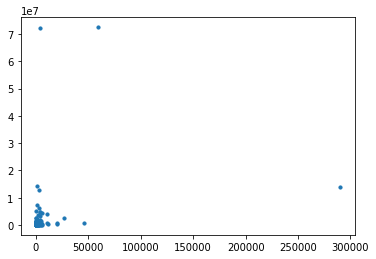

In [84]:
plt.scatter(x='image_sum_comment', y = 'no_of_follower', data=df, s=10)

In [85]:
from sklearn.cluster import KMeans

In [86]:
df2 = df[['Food_words', 'Beauty_words', 'Sport_words', 'Travel_words', 'Music_words', 'Education_words', 'Art_words', 'Acting_words']].dropna()

In [87]:
kmeans = KMeans(n_clusters=9, random_state=444).fit(df2)

In [88]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 7, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 8, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
from numpy import array

In [90]:
# kmeans.cluster_centers_

In [91]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.preprocessing import MinMaxScaler

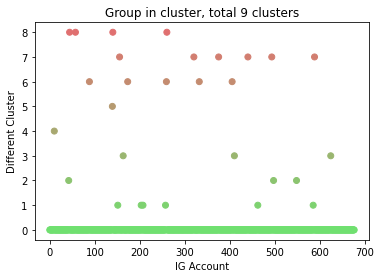

In [92]:
values = kmeans.labels_
scaled = MinMaxScaler().fit_transform(values.reshape(-1, 1))
colorLeft = np.array([112, 224, 112])
colorRight = np.array([224, 112, 112])
colors = np.array([a * colorRight + (1 - a) * colorLeft for a in scaled], dtype = np.int64)
plt.title("Group in cluster, total 9 clusters")
plt.xlabel("IG Account")
plt.ylabel("Different Cluster")
plt.scatter(np.arange(len(values)), values, c = colors/255)

In [143]:
# Cluster 9
from sklearn.metrics import silhouette_score
silhouette_score(df2, kmeans.labels_)

0.8512063034716708

In [144]:
# cluster 8 - score: 0.819187113098301
# cluster 9 - score: 0.8512063034716708
# cluster 10 - score: 0.79473254997339

In [145]:
# 1st Cluster (Art)
df3 = df2[kmeans.labels_ == 0]
c1 = pd.merge(df, df3, left_index=True, right_index=True)
c1['Category'] = 'Art'
c1_new = c1[['ig_id', 'Category']]

In [146]:
# 2nd cluster - Food
df4 = df2[kmeans.labels_ == 1]
c2 = pd.merge(df, df4, left_index=True, right_index=True)
c2['Category'] = 'Food'
c2_new = c1[['ig_id', 'Category']]

In [147]:
# 3rd cluster (Acting/Media)
df5 = df2[kmeans.labels_ == 2]
c3 = pd.merge(df, df5, left_index=True, right_index=True)
c3['Category'] = 'Acting/Media'
c3_new = c3[['ig_id', 'Category']]

In [148]:
# 4th cluster (Sport)
df6 = df2[kmeans.labels_ == 3]
c4 = pd.merge(df, df6, left_index=True, right_index=True)
c4['Category'] = 'Sport'
c4_new = c1[['ig_id', 'Category']]

In [149]:
# 5th cluster (Education1)
df7 = df2[kmeans.labels_ == 4]
c5 = pd.merge(df, df7, left_index=True, right_index=True)
c5['Category'] = 'Education'
c5_new = c5[['ig_id', 'Category']]

In [150]:
# 6th cluster (Beauty)
df8 = df2[kmeans.labels_ == 5]
c6 = pd.merge(df, df8, left_index=True, right_index=True)
c6['Category'] = 'Beauty'
c6_new = c6[['ig_id', 'Category']]

In [151]:
# 7th cluster (Music)
df9 = df2[kmeans.labels_ == 6]
c7 = pd.merge(df, df9, left_index=True, right_index=True)
c7['Category'] = 'Music'
c7_new = c7[['ig_id', 'Category']]

In [152]:
# 8th cluster - Travel
df10 = df2[kmeans.labels_ == 7]
c8 = pd.merge(df, df10, left_index=True, right_index=True)
c8['Category'] = 'Travel'
c8_new = c8[['ig_id', 'Category']]

In [153]:
# 9th cluster - Education2
df11 = df2[kmeans.labels_ == 8]
c9 = pd.merge(df, df11, left_index=True, right_index=True)
c9['Category'] = 'Education'
c9_new = c9[['ig_id', 'Category']]

In [154]:
d1 = pd.concat([c1_new, c2_new], axis=0)
d1 = pd.concat([d1, c3_new], axis=0)
d1 = pd.concat([d1, c4_new], axis=0)
d1 = pd.concat([d1, c5_new], axis=0)
d1 = pd.concat([d1, c6_new], axis=0)
d1 = pd.concat([d1, c7_new], axis=0)
d1 = pd.concat([d1, c8_new], axis=0)
d1 = pd.concat([d1, c9_new], axis=0)

In [163]:
# some rows have duplicated
d1 = d1.drop_duplicates(subset='ig_id', keep='first', inplace=False, ignore_index=False).reset_index(drop=True)

In [166]:
d1

,ig_id,Category
0,100mosthk,Art
1,28kkss,Art
2,53yfp,Art
3,6ixty8ight68,Art
4,79hkartist,Art
...,...,...
663,this.is.1218,Travel
664,asartisticasyou,Education
665,beaconcollegehk,Education
666,cookingsiulam,Education


In [167]:
d1.set_index('ig_id').to_csv('result-category.csv')